In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from sklearn import datasets
from sklearn import neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
import statistics

In [2]:
readIn = pd.read_csv('admitData.csv', low_memory = False)

In [3]:
readIn[:3]

,aID,TERM_CODE,EntryTermOffset,STU_TYPE,enrollmentProbabilityScore,dtCreated,enrollFlag,RET_T2,RET_T3,SUS,...,SAT_MathQuant,SAT_Writing,SAT_WritingEquiv,SAT_CompEquiv,SAT_MathQuantEquiv,SAT_EngVerbEquiv,HS_VAR1,ComboRank,RegressionRank,AcademicRank
0,2886776,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2886777,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2886778,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping:

cID - extraneous identifier 
Market_Segment - 
Facebook_Status - 
Parent_ACU_Distance
Territory_URM
Territory_Manager
Territory_State
Territory_County
Territory_ZIP
enrollmentProbabilityScore - being put into currentModel variable
Territory_URM
Territory_Manager
Territory_Code

SourceCat_txt
SourceGroup_txt
Source_txt
SourceCat_INQ_txt
SourceGroup_INQ_txt
Source_INQ_txt
SearchSourceFlag

HSCEEB
ChurchCode
HasValidPhone
ClearinghouseFICE
ClearinghouseName
ClearinghouseDistanceFromHome
ClearinghouseControl
ClearinghouseCost
ClearinghouseZip5
ChurchActivities
AppLaunchGroup

//// for now dropping all PRISM information 
PRIZM_Segment
PRIZM_SocialSegment
PRIZM_LifestyleSegment
// PRIZM_HouseholdIncome
PRIZM_EducBaPercent -> ask Garrett about this 

Latitude
Longitude
ZIP_CODE
ENROLL_STATUS
ADMIT_TYPE
IntentToEnroll
enrollModelScore
enrollModelScoreBand
applyModelScore
QUAL_Status
QUAL_Date

ComboRank
RegressionRank
AcademicRank
HS_VAR1
SAT_EngVerbEquiv
SAT_MathQuantEquiv
SAT_CompEquiv
SAT_WritingEquiv

NCAA_GPA
ACU_AcademicRating
HS_RANK
CLASS_RANK_QUARTILE_CALC
CLASS_RANK_QUARTILE
PSAT_SAT_ScoreBand
PSU_GPA_Status

FAFSA
Camp_Count
Sibling_Count
Referral_Count - how many people wanted the student to come / Referral_Ind gives a boolean if they were refered 
MarketSegment_txt - MarketSegment should have all we need 


//// ask about
STU_TYPE
dtCreated
CollegeCode
HSCode

In [4]:
original = readIn
currentModel = original['enrollmentProbabilityScore']
currentModel2 = original['ComboRank']

In [5]:
original = original.drop(['cID', 'Territory_Code', 'Market_Segment', 'enrollmentProbabilityScore', 'Territory_URM', 'Territory_Manager', 'Facebook_Status', 'Parent_ACU_Distance', 'Territory_URM', 'Territory_Manager', 'Territory_State', 'Territory_County', 'Territory_ZIP'], axis = 1)
original = original.drop(['SearchSourceFlag', 'Source_INQ_txt', 'SourceGroup_INQ_txt', 'SourceCat_INQ_txt', 'Source_txt', 'SourceGroup_txt', 'SourceCat_txt'], axis = 1)
original = original.drop(['AppLaunchGroup', 'ChurchActivities', 'ClearinghouseZip5', 'ClearinghouseZip5', 'ClearinghouseCost', 'ClearinghouseControl', 'ClearinghouseLevel', 'ClearinghouseDistanceFromHome', 'ClearinghouseName', 'ClearinghouseFICE', 'HasValidPhone', 'ChurchCode', 'HSCEEB'], axis = 1)
original = original.drop(['PRIZM_Segment', 'PRIZM_SocialSegment', 'PRIZM_LifestyleSegment', 'PRIZM_EducBaPercent'], axis = 1)
original = original.drop(['Latitude', 'Longitude', 'ZIP_CODE', 'ENROLL_STATUS', 'ADMIT_TYPE', 'IntentToEnroll', 'enrollModelScore', 'enrollModelScoreBand', 'applyModelScore', 'QUAL_Status', 'QUAL_Date'], axis = 1)
original = original.drop(['ComboRank', 'RegressionRank', 'AcademicRank', 'HS_VAR1', 'SAT_EngVerbEquiv', 'SAT_MathQuantEquiv', 'SAT_CompEquiv', 'SAT_WritingEquiv'], axis = 1)
original = original.drop(['NCAA_GPA', 'ACU_AcademicRating', 'HS_RANK', 'CLASS_RANK_QUARTILE_CALC', 'CLASS_RANK_QUARTILE', 'PSAT_SAT_ScoreBand', 'PSU_GPA_Status'], axis = 1)
original = original.drop(['FAFSA', 'Sibling_Count', 'Camp_Count', 'Referral_Count', 'MarketSegment_txt'], axis = 1)
original = original.drop(['STU_TYPE', 'dtCreated', 'CollegeCode', 'HSCode'], axis = 1)


In [6]:
# we should now have 58 columns. We can cut this down more
len(original.columns)

59

In [7]:
# number of original rows
original.shape[0]

550360

Now we're dropping all rows where there are high school students whose names ACU has bought and hte studnet has showed no interest. Now we only have students who have inquired about ACU in some form. 

In [8]:
original = original[pd.notnull(original['INQ'])]
original.shape[0]

185211

# Preston's to do list # 

For below - only use rows with co
1. summary statistics - how many of the students who have some value in the column 'APP' (Aka not NaN) had an enrollFlag = 1?
2. summmary statistics - how many females verses how many males?
3. graphs - graph the income (should be in column PRIZM_HouseholdIncome)
4. graph / histogram ACT_COMP and SAT_Comp for all students and for all students who have enrollFlag = 1
5. Find most common State_txt and County_txt and Country_txt for information purposes
6. See how percentage of students who had non-zero Core_Ind who had enrollFlag = 1 verses students who zero Core_Ind who had enrollFlag = 1

In [9]:
# a list of all columns we kept
list(original.columns.values)

['aID',
 'TERM_CODE',
 'EntryTermOffset',
 'enrollFlag',
 'RET_T2',
 'RET_T3',
 'SUS',
 'PSP',
 'INQ',
 'APP',
 'COMP',
 'ADM',
 'DEP',
 'CNF',
 'PPT',
 'CAN',
 'FIRSTVISIT',
 'FIRSTSCORE',
 'FirstSeniorVisit',
 'BirthDate',
 'Gender',
 'Ethnicity_txt',
 'Denomination_txt',
 'Legacy_Ind',
 'Sibling_Ind',
 'Camper_Ind',
 'Board_Ind',
 'Core_Ind',
 'Referral_Ind',
 'Athlete_Ind',
 'Honors_Elligible_Ind',
 'Parent_Same_LastName',
 'State_txt',
 'County_txt',
 'ZIP5',
 'ACU_Distance',
 'ACU_Distance_Band',
 'Parent_ACU_Distance_Band',
 'Territory_txt',
 'PRIZM_HouseholdIncome',
 'Country_txt',
 'QUAL_Familiarity',
 'QUAL_Rank',
 'HS_SIZE',
 'HS_RankPercent',
 'HS_GPA_CALC',
 'SAT_TO_ACT_EQUIV',
 'ACU_AcadRatingBand',
 'NUM_Advanced_Courses',
 'ACT_COMP',
 'ACT_EngVerb',
 'ACT_MathQuant',
 'ACT_Reading',
 'ACT_Science',
 'ACT_Writing',
 'SAT_Comp',
 'SAT_EngVerb',
 'SAT_MathQuant',
 'SAT_Writing']

In [10]:
applied = original[original.APP.notnull()]

In [11]:
applied[:5]

,aID,TERM_CODE,EntryTermOffset,enrollFlag,RET_T2,RET_T3,SUS,PSP,INQ,APP,...,ACT_COMP,ACT_EngVerb,ACT_MathQuant,ACT_Reading,ACT_Science,ACT_Writing,SAT_Comp,SAT_EngVerb,SAT_MathQuant,SAT_Writing
26748,2514646,201510,4,0,0.0,0.0,16:25.9,55:14.4,3/1/14 0:00,3/1/14 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26749,2514997,201710,2,0,0.0,0.0,50:42.8,54:16.8,51:04.0,9/1/15 0:00,...,35.0,35.0,31.0,36.0,36.0,31.0,1510.0,800.0,710.0,780.0
26750,2511868,201710,2,1,1.0,1.0,34:24.2,56:05.5,48:51.5,7/8/15 0:00,...,31.0,25.0,30.0,35.0,32.0,24.0,NaN,NaN,NaN,NaN
26751,2511934,201710,2,0,0.0,0.0,34:30.1,56:05.5,48:51.5,7/5/15 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,550.0,510.0,450.0
26752,2512317,201710,2,0,0.0,0.0,35:06.0,56:05.5,48:51.5,8/8/15 0:00,...,28.0,25.0,27.0,32.0,29.0,24.0,NaN,NaN,NaN,NaN


In [12]:
appliedAndEnrolled = applied[applied["enrollFlag"] == 1]

In [13]:
appliedAndEnrolled[:3]

,aID,TERM_CODE,EntryTermOffset,enrollFlag,RET_T2,RET_T3,SUS,PSP,INQ,APP,...,ACT_COMP,ACT_EngVerb,ACT_MathQuant,ACT_Reading,ACT_Science,ACT_Writing,SAT_Comp,SAT_EngVerb,SAT_MathQuant,SAT_Writing
26750,2511868,201710,2,1,1.0,1.0,34:24.2,56:05.5,48:51.5,7/8/15 0:00,...,31.0,25.0,30.0,35.0,32.0,24.0,NaN,NaN,NaN,NaN
26770,2529864,201610,3,1,1.0,1.0,31:34.4,54:25.3,10/28/13 0:00,7/23/14 0:00,...,21.0,20.0,24.0,17.0,24.0,NaN,1010.0,480.0,530.0,460.0
26771,2530511,201610,3,1,1.0,1.0,37:01.9,54:14.4,8/11/14 9:37,8/20/14 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,500.0,560.0,460.0


In [14]:
#This is the number of students who both applied and enrolled.
appliedAndEnrolled.shape[0]

4464

In [15]:
originalSize = original.shape[0]

In [16]:
genderSizes = original.groupby('Gender').size()

In [17]:
#1 is probably female, 2 is probably male 
genderSizes

Gender
1.0    104279
2.0     69793
dtype: int64

In [18]:
total = 104279 + 69793;
female = 104279. / total * 100
male = 69793. / total * 100
print("female: ", female, "\nmale: ", male)

female:  59.90567121650812 
male:  40.09432878349189


In [19]:
enrolled = original[original['enrollFlag'] == 1]

In [20]:
#no household income info for 1,399 enrolled students
enrolled.PRIZM_HouseholdIncome.describe()

count      3065.000000
mean      70589.617292
std       30630.418608
min       18405.000000
25%       47971.000000
50%       63587.000000
75%       88790.000000
max      201471.000000
Name: PRIZM_HouseholdIncome, dtype: float64

In [21]:
#someone got an 1100 on their ACT somehow, so I restricted the scores to at or below 36
generalACT = original[original['ACT_COMP'] <= 36.0].ACT_COMP.describe()
generalACT

count    18020.000000
mean        22.467925
std          4.537494
min          5.000000
25%         19.000000
50%         22.000000
75%         25.000000
max         36.000000
Name: ACT_COMP, dtype: float64

In [22]:
generalSAT = original.SAT_Comp.describe()
generalSAT

count    16871.000000
mean      1013.272005
std        172.639850
min         15.000000
25%        900.000000
50%       1010.000000
75%       1120.000000
max       1920.000000
Name: SAT_Comp, dtype: float64

In [23]:
enrolledACT = enrolled.ACT_COMP.describe()
enrolledACT

count    2909.000000
mean       23.348230
std         3.969547
min        10.000000
25%        21.000000
50%        23.000000
75%        26.000000
max        35.000000
Name: ACT_COMP, dtype: float64

In [24]:
enrolledSAT = enrolled.SAT_Comp.describe()
enrolledSAT

count    2743.000000
mean     1058.497995
std       146.873832
min       610.000000
25%       960.000000
50%      1060.000000
75%      1150.000000
max      1570.000000
Name: SAT_Comp, dtype: float64

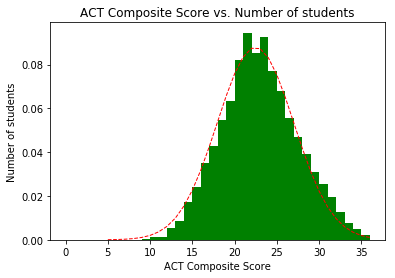

In [25]:
#feel free to rename axes, title, etc.
sortedGeneralACTFiltered = original[original.ACT_COMP <= 36].ACT_COMP.sort_values()
plt.hist(sortedGeneralACTFiltered, 36, (0,36), normed = 1, facecolor = "green")
y = mlab.normpdf(sortedGeneralACTFiltered, sortedGeneralACTFiltered.mean(), sortedGeneralACTFiltered.std())
l = plt.plot(sortedGeneralACTFiltered, y, 'r--', linewidth=1)

plt.xlabel('ACT Composite Score')
plt.ylabel('Number of students')
plt.title('ACT Composite Score vs. Number of students')
plt.savefig('ACTHistogram.png')
plt.show()

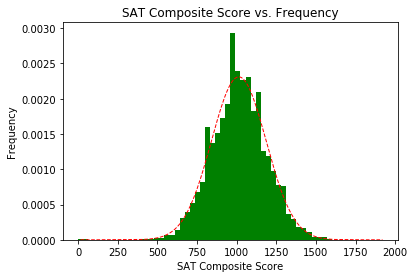

In [26]:
#feel free to rename axes, title, etc.
sortedGeneralSATFiltered = original[original.SAT_Comp.notnull()].SAT_Comp.sort_values()
plt.hist(sortedGeneralSATFiltered, 50, (0,1600), normed = 1, facecolor = "green")
y = mlab.normpdf(sortedGeneralSATFiltered, sortedGeneralSATFiltered.mean(), sortedGeneralSATFiltered.std())
l = plt.plot(sortedGeneralSATFiltered, y, 'r--', linewidth=1)



plt.xlabel('SAT Composite Score')
plt.ylabel('Frequency')
plt.title('SAT Composite Score vs. Frequency')
plt.savefig('SaTHistogram.png')
plt.show()

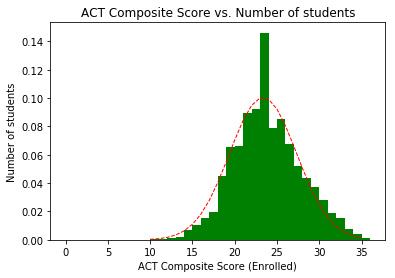

In [27]:
#feel free to rename axes, title, etc.
sortedEnrolledACTFiltered = enrolled[enrolled.ACT_COMP <= 36].ACT_COMP.sort_values()
plt.hist(sortedEnrolledACTFiltered, 36, (0,36), normed = 1, facecolor = "green")
y = mlab.normpdf(sortedEnrolledACTFiltered, sortedEnrolledACTFiltered.mean(), sortedEnrolledACTFiltered.std())
l = plt.plot(sortedEnrolledACTFiltered, y, 'r--', linewidth=1)

plt.xlabel('ACT Composite Score (Enrolled)')
plt.ylabel('Number of students')
plt.title('ACT Composite Score vs. Number of students')
plt.savefig('enrolledACTHistogram.png')
plt.show()

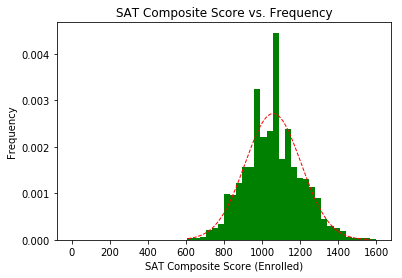

In [28]:
#feel free to rename axes, title, etc.
sortedEnrolledSATFiltered = enrolled[enrolled.SAT_Comp.notnull()].SAT_Comp.sort_values()
plt.hist(sortedEnrolledSATFiltered, 50, (0,1600), normed = 1, facecolor = "green")
y = mlab.normpdf(sortedEnrolledSATFiltered, sortedEnrolledSATFiltered.mean(), sortedEnrolledSATFiltered.std())
l = plt.plot(sortedEnrolledSATFiltered, y, 'r--', linewidth=1)



plt.xlabel('SAT Composite Score (Enrolled)')
plt.ylabel('Frequency')
plt.title('SAT Composite Score vs. Frequency')
plt.savefig('enrolledSATHistogram.png')
plt.show()

In [29]:
stateCount = original.groupby('State_txt').size()
stateCount.sort_values(ascending = False)[:5]

State_txt
TX    147386
CA      3760
OK      2481
CO      2464
TN      2166
dtype: int64

In [30]:
countyCount = original.groupby('County_txt').size()
countyCount.sort_values(ascending = False)[:10]

County_txt
Tarrant                           15400
Harris                            14375
Dallas                            12798
Bexar                              9253
Collin                             6550
Denton                             6235
Williamson                         5558
Travis                             4438
El Paso                            3839
Hidalgo                            3479
dtype: int64

In [31]:
countryCount = original.groupby('Country_txt').size()
countryCount.sort_values(ascending = False)[:5]

Country_txt
US - United States    176903
MX - Mexico              948
HN - Honduras            674
HK - Hong Kong           354
NG - Nigeria             319
dtype: int64

In [32]:
countryCount = enrolled.groupby('Country_txt').size()
countryCount.sort_values(ascending = False)[:5]

Country_txt
US - United States    4313
NP - Nepal              32
CN - China              13
JP - Japan              11
HN - Honduras           11
dtype: int64

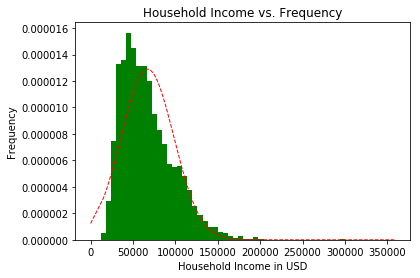

In [41]:
householdIncome = original[original.PRIZM_HouseholdIncome.notnull()].PRIZM_HouseholdIncome.sort_values()
plt.hist(householdIncome, 50, (0,300000), normed = 1, facecolor = "green")
y = mlab.normpdf(householdIncome, householdIncome.mean(), householdIncome.std())
l = plt.plot(householdIncome, y, 'r--', linewidth=1)

plt.xlabel('Household Income in USD')
plt.ylabel('Frequency')
plt.title('Household Income vs. Frequency')
plt.savefig('houseHoldIncomeHistogram.png')
plt.show()

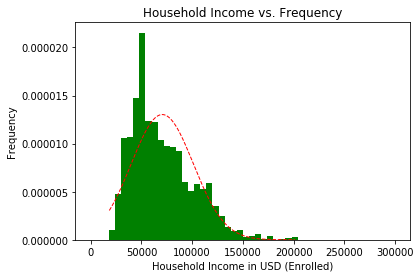

In [45]:
householdIncomeEnrolled = enrolled[enrolled.PRIZM_HouseholdIncome.notnull()].PRIZM_HouseholdIncome.sort_values()
plt.hist(householdIncomeEnrolled, 50, (0,300000), normed = 1, facecolor = "green")
y = mlab.normpdf(householdIncomeEnrolled, householdIncomeEnrolled.mean(), householdIncomeEnrolled.std())
l = plt.plot(householdIncomeEnrolled, y, 'r--', linewidth=1)

plt.xlabel('Household Income in USD (Enrolled)')
plt.ylabel('Frequency')
plt.title('Household Income vs. Frequency')
plt.savefig('houseHoldIncomeEnrolledHistogram.png')
plt.show()

In [43]:
original.groupby(['Core_Ind', 'enrollFlag']).size()

Core_Ind  enrollFlag
0         0             175541
          1               3036
1         0               5205
          1               1429
dtype: int64

In [44]:
enrolledCount = original[original['enrollFlag'] == 1].enrollFlag.size
percentEnrolledNotCore = 3036/enrolledCount * 100
percentCoreEnrolled = 1429/enrolledCount * 100
print("Percent enrolled but do not have legacy, etc.: ", percentEnrolledNotCore)
print("Percent enrolled but are legacy, etc.: ", percentCoreEnrolled)

Percent enrolled but do not have legacy, etc.:  67.99552071668533
Percent enrolled but are legacy, etc.:  32.004479283314666
